# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [187]:
import pandas as pd

# dataset has no header; w/o header=None, we would only get 689 observations
# NaNs stored as '?'s in raw dataset; na_values='?' in read_csv fixes that
credit_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None, na_values='?')

print(credit_data.shape)

pd.set_option('display.max_rows', 1000)
for c in credit_data.columns:
    print("\n", credit_data[c].value_counts(dropna=False), sep='')

(690, 16)

b      468
a      210
NaN     12
Name: 0, dtype: int64

NaN      12
22.67     9
20.42     7
24.50     6
22.50     6
25.00     6
18.83     6
23.58     6
20.67     6
19.17     6
27.67     5
27.83     5
33.17     5
23.25     5
23.08     5
23.00     5
26.17     4
28.58     4
32.33     4
27.25     4
24.58     4
25.17     4
35.17     4
26.67     4
41.17     4
20.00     4
25.67     4
22.92     4
23.50     4
24.75     4
22.08     4
20.75     4
34.17     4
29.50     4
18.58     3
29.58     3
19.42     3
20.83     3
28.17     3
21.83     3
17.92     3
22.17     3
36.75     3
36.17     3
16.33     3
32.25     3
34.83     3
23.92     3
39.17     3
19.58     3
20.50     3
28.25     3
36.67     3
25.75     3
21.50     3
34.00     3
28.75     3
37.50     3
22.75     3
31.25     3
20.17     3
25.25     3
27.58     3
26.75     3
19.50     3
22.25     3
23.75     3
30.17     3
18.17     3
40.58     3
19.67     3
37.33     3
28.67     3
21.17     3
21.92     3
20.08     3
48.17     3
29.83    

In [188]:
# fixing two columns in the raw dataset that store continuous values as int64s
credit_data[[10, 14]] = credit_data[[10, 14]].astype(float)

credit_data.dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10    float64
11     object
12     object
13    float64
14    float64
15     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [189]:
from scipy.stats import ttest_ind

# creating separate approved and rejected dataframes
approved = credit_data[credit_data[15] == '+']
rejected = credit_data[credit_data[15] == '-']

# creating empty lists with which to create a dataframe of t-test results...
continuous_features = [1, 2, 7, 10, 13, 14]
t_stats = []
p_values = []

# filling those lists with t-test results, dropping NaNs during calculation...
for continuous_feature in continuous_features:
    t_stats.append(ttest_ind(approved[continuous_feature], 
                             rejected[continuous_feature],
                             nan_policy='omit')[0])
    p_values.append(ttest_ind(approved[continuous_feature], 
                              rejected[continuous_feature],
                              nan_policy='omit')[1])

# creating a dictionary from the lists with which to create the dataframe...
dict = {'t_stats': t_stats, 'p_values': p_values}

# creating the data_frame...
t_test_results = pd.DataFrame(dict, index=continuous_features)
    
t_test_results

,t_stats,p_values
1,4.292216,2.027664e-05
2,5.529983,4.551681e-08
7,8.935820,3.671054e-18
10,11.667004,7.957719e-29
13,-2.635825,8.586135e-03
14,4.680216,3.452026e-06


In [190]:
print(approved[10].describe())
print()
print(rejected[10].describe())
approved[10].quantile(.99)
# both have a min of 0; all rejected values & 99% of approved values are <= 20

count    307.000000
mean       4.605863
std        6.320242
min        0.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       67.000000
Name: 10, dtype: float64

count    383.000000
mean       0.631854
std        1.900049
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       20.000000
Name: 10, dtype: float64


19.939999999999998

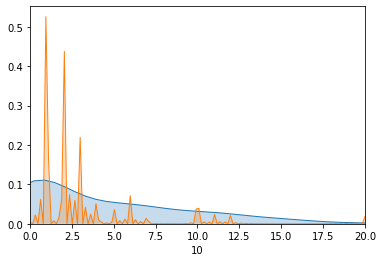

In [191]:
import seaborn as sns
ax = sns.distplot(approved[10], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
sns.distplot(rejected[10], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
# setting upper bound to 20; this only excludes 1% of approved values
ax.set(xlim=(0, 20));

In [192]:
print(approved[13].describe())
print()
print(rejected[13].describe())
rejected[13].quantile(.99)
# both have min of 0; all approved values & 99% of rejected values are <= 840

count    301.000000
mean     164.421927
std      161.770675
min        0.000000
25%        0.000000
50%      120.000000
75%      280.000000
max      840.000000
Name: 13, dtype: float64

count     376.000000
mean      199.699468
std       181.564835
min         0.000000
25%       100.000000
50%       167.500000
75%       272.000000
max      2000.000000
Name: 13, dtype: float64


802.0

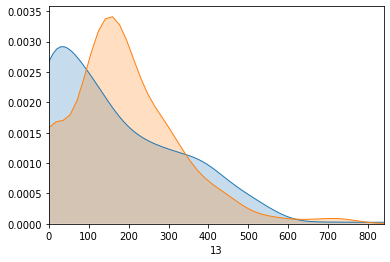

In [193]:
ax = sns.distplot(approved[13], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
sns.distplot(rejected[13], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
# setting upper bound to 840; this only excludes 1% of rejected values
ax.set(xlim=(0, 840));

In [194]:
observed_0 = pd.crosstab(credit_data[0], credit_data[15], margins=True).values
observed_3 = pd.crosstab(credit_data[3], credit_data[15], margins=True).values
observed_4 = pd.crosstab(credit_data[4], credit_data[15], margins=True).values
observed_5 = pd.crosstab(credit_data[5], credit_data[15], margins=True).values
observed_6 = pd.crosstab(credit_data[6], credit_data[15], margins=True).values
observed_8 = pd.crosstab(credit_data[8], credit_data[15], margins=True).values
observed_9 = pd.crosstab(credit_data[9], credit_data[15], margins=True).values
observed_11 = pd.crosstab(credit_data[11], credit_data[15], margins=True).values
observed_12 = pd.crosstab(credit_data[12], credit_data[15], margins=True).values

In [195]:
from scipy.stats import chi2_contingency

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_0)

categorical_feature_arrays = [observed_0, observed_3, observed_4, observed_5,
                            observed_6, observed_8, observed_9, observed_11,
                            observed_12]
chi_squareds = []
p_values = []
degrees_of_freedom = []

for categorical_feature_array in categorical_feature_arrays:
    chi_squareds.append(chi2_contingency(categorical_feature_array)[0])
    p_values.append(chi2_contingency(categorical_feature_array)[1])
    degrees_of_freedom.append(chi2_contingency(categorical_feature_array)[2])
    
# creating a dictionary from the lists with which to create the dataframe...
dict = {'chi_squareds': chi_squareds, 'p_values': p_values,
        'degrees_of_freedom': degrees_of_freedom}

# creating the data_frame...
chi_squared_test_results = pd.DataFrame(dict, index=[0, 3, 4, 5, 6, 8, 9, 11, 12])
    
chi_squared_test_results

,chi_squareds,p_values,degrees_of_freedom
0,0.411435,9.815300e-01,4
3,26.234075,2.013603e-04,6
4,26.234075,2.013603e-04,6
5,98.325203,9.446934e-10,28
6,45.034207,4.097262e-04,18
8,358.100326,3.125328e-76,4
9,144.927676,2.485585e-30,4
11,0.690089,9.525455e-01,4
12,9.191570,1.630875e-01,6


In [196]:
contingency_table_8 = pd.crosstab(credit_data[8], credit_data[15], normalize='index')
contingency_table_8

15,+,-
8,,
f,0.069909,0.930091
t,0.786704,0.213296


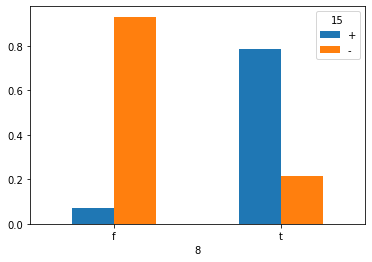

In [197]:
ax = contingency_table_8.plot.bar(rot=0)

In [198]:
contingency_table_0 = pd.crosstab(credit_data[0], credit_data[15], normalize='index')
contingency_table_0

15,+,-
0,,
a,0.466667,0.533333
b,0.440171,0.559829


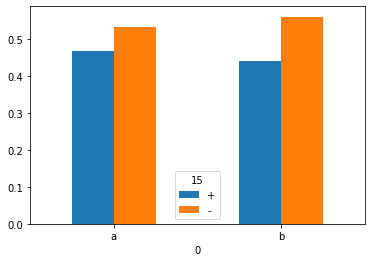

In [199]:
ax = contingency_table_0.plot.bar(rot=0)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?

- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

When I ran t-tests for all the continuous features, I got the smallest p-value for feature 10 (7.957719e-29), and the largest p-value for feature 13 (8.586135e-03). Even the p-value for feature 13 is below .01, so at a significance level of .01 there is a statistically significant relationship between each of the continuous features and credit approval. Looking at the visualization for feature 10, one can see that there is a pronounced relationship between a credit rejection and having a lower value for feature 10 - see the spikes on the left side. Looking at the visualization for feature 13, one can see that there is some relationship, but not a particularly strong one, between credit rejection and having a higher value for feature 13 - see the difference between the peaks of the two curves.

When I ran Chi-squared tests for all the categorical features, I got the smallest p-value for feature 8 (3.125328e-76), and the largest p-value for feature 0 (9.815300e-01). The p-values for features 0, 11, 12 are all greater than .05, so at a significance level of .05 the relationship between each of those features and credit approval is not statistically significant. For each of the remaining categorical features (3, 4, 5, 6, 8, 9), the p-value is less than .01, so even at a significance level of .01 there is a statistically significant relationship between those remaining features and credit approval. Looking at the visualization for feature 8, one can see that there is an incredibly strong relationship between being a t rather than an f and credit approval. Looking at the visualization for feature 0, one can see that there is a almost no relationship between being an a rather than a b and credit approval.